# Exploring Data Relationships

In this notebook, we will identify key relationships and trends within the dataset in order to gain ideas for feature extraction and to get a better understanding of what this dataset can tell us.

## Import Requirements and Cleaned Dataset

In [1]:
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy import stats
import seaborn as sns

# for loading algoseek data
import clickhouse_driver

# for algoseek user credentials
from dotenv import load_dotenv
import os

# to manage paths
import os.path
import sys

# important settings
pd.set_option('max_columns', 100)

In [2]:
df = pd.read_parquet('data/AAPL.parquet')

## Summary Statistics

## Plotting Relationships

## Correlations Between Variables

In [3]:
df.corr()

,SecId,OpenBidSize,OpenAskSize,FirstTradeSize,HighBidSize,HighAskSize,HighTradeSize,LowBidSize,LowAskSize,LowTradeSize,CloseBidSize,CloseAskSize,LastTradeSize,CancelSize,NBBOQuoteCount,TradeAtBid,TradeAtBidMid,TradeAtMid,TradeAtMidAsk,TradeAtAsk,TradeAtCrossOrLocked,Volume,TotalTrades,FinraVolume,UptickVolume,DowntickVolume,RepeatUptickVolume,RepeatDowntickVolume,UnknownTickVolume
SecId,1.000000,0.000439,0.001774,-0.001125,-0.008427,-0.001010,0.000269,-0.001464,-0.003438,0.000782,0.000460,0.001806,-0.001416,0.001643,0.092849,0.016798,0.008702,0.018485,0.010183,0.012628,0.012015,0.016555,0.058779,0.040196,0.012627,0.014495,0.020556,0.021171,-0.000871
OpenBidSize,0.000439,1.000000,0.113545,0.052163,0.483631,0.103832,0.035683,0.350398,0.075885,0.026642,0.382151,0.123442,0.003659,0.002952,0.171855,0.115935,0.057908,0.053246,0.048563,0.097134,0.062735,0.135398,0.134336,0.140903,0.074021,0.082801,0.129651,0.140530,-0.004453
OpenAskSize,0.001774,0.113545,1.000000,0.034335,0.080547,0.350698,0.018831,0.083664,0.456996,0.020124,0.123670,0.254306,0.003287,0.002107,0.099745,0.074164,0.035149,0.026655,0.036984,0.068364,0.055009,0.090495,0.090285,0.090059,0.041098,0.052499,0.116956,0.084270,-0.002738
FirstTradeSize,-0.001125,0.052163,0.034335,1.000000,0.041012,0.007257,0.260206,0.008039,0.018815,0.180172,0.001323,0.000898,0.028106,0.000341,-0.007070,0.299821,0.076456,0.062102,0.094555,0.292623,0.012249,0.393062,-0.004621,0.139160,0.269967,0.228959,0.186824,0.186561,0.000288
HighBidSize,-0.008427,0.483631,0.080547,0.041012,1.000000,0.035283,0.049001,0.181698,0.050858,0.007016,0.357192,0.063707,0.003717,0.001510,-0.011558,0.044322,0.010432,0.006458,0.005121,0.032939,0.010334,0.048932,-0.007863,0.018986,0.025129,0.024100,0.030836,0.046434,0.003550
HighAskSize,-0.001010,0.103832,0.350698,0.007257,0.035283,1.000000,0.009474,0.070409,0.116363,0.002959,0.108297,0.513833,0.001954,0.001787,0.109615,0.046193,0.026225,0.027108,0.034020,0.052121,0.037441,0.056657,0.109259,0.096668,0.027867,0.032287,0.098697,0.069472,-0.001510
HighTradeSize,0.000269,0.035683,0.018831,0.260206,0.049001,0.009474,1.000000,0.003561,0.005119,0.013873,0.001517,0.001399,0.085319,0.007287,0.002318,0.021200,0.013845,0.015952,0.098368,0.319823,0.034024,0.212067,0.006429,0.170859,0.296546,0.028882,0.124865,0.036078,-0.000059
LowBidSize,-0.001464,0.350398,0.083664,0.008039,0.181698,0.070409,0.003561,1.000000,0.032130,0.009795,0.440694,0.084261,0.001975,0.002212,0.184338,0.089568,0.046707,0.048306,0.049498,0.057302,0.053560,0.086949,0.188660,0.141986,0.043383,0.053900,0.099900,0.140377,0.001006
LowAskSize,-0.003438,0.075885,0.456996,0.018815,0.050858,0.116363,0.005119,0.032130,1.000000,0.025535,0.073982,0.211025,0.003824,0.000824,-0.011925,0.024525,0.002002,0.002365,0.002015,0.032477,0.019976,0.035448,-0.001229,0.013953,0.013772,0.013469,0.054792,0.020045,0.000400
LowTradeSize,0.000782,0.026642,0.020124,0.180172,0.007016,0.002959,0.013873,0.009795,0.025535,1.000000,0.002433,0.001589,0.072613,0.008369,0.000114,0.364002,0.116849,0.082871,0.009153,0.022240,0.035519,0.234194,0.002324,0.157100,0.025632,0.363824,0.034581,0.106150,-0.000021


In [ ]:
df.corr()[['Returns', 'Volume']]

In [ ]:
df.shape

(1087348, 63)

In [ ]:
df.columns

Index(['TradeDate', 'Ticker', 'SecId', 'OpenBarTimeOffset', 'OpenBidPrice',
       'OpenBidSize', 'OpenAskPrice', 'OpenAskSize', 'FirstTradeTimeOffset',
       'FirstTradePrice', 'FirstTradeSize', 'HighBidTimeOffset',
       'HighBidPrice', 'HighBidSize', 'HighAskTimeOffset', 'HighAskPrice',
       'HighAskSize', 'HighTradeTimeOffset', 'HighTradePrice', 'HighTradeSize',
       'LowBidTimeOffset', 'LowBidPrice', 'LowBidSize', 'LowAskTimeOffset',
       'LowAskPrice', 'LowAskSize', 'LowTradeTimeOffset', 'LowTradePrice',
       'LowTradeSize', 'CloseBarTimeOffset', 'CloseBidPrice', 'CloseBidSize',
       'CloseAskPrice', 'CloseAskSize', 'LastTradeTimeOffset',
       'LastTradePrice', 'LastTradeSize', 'MinSpread', 'MaxSpread',
       'CancelSize', 'VolumeWeightPrice', 'NBBOQuoteCount', 'TradeAtBid',
       'TradeAtBidMid', 'TradeAtMid', 'TradeAtMidAsk', 'TradeAtAsk',
       'TradeAtCrossOrLocked', 'Volume', 'TotalTrades', 'FinraVolume',
       'FinraVolumeWeightPrice', 'UptickVolume', 'Dow

In [ ]:
df.dtypes

TradeDate                       object
Ticker                          object
SecId                            int64
OpenBarTimeOffset               object
OpenBidPrice                    object
                                ...   
TradeToMidVolWeightRelative     object
TimeWeightBid                   object
TimeWeightAsk                   object
Hour                             int64
Returns                        float64
Length: 63, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1087348 entries, 2017-12-01 09:00:00 to 2022-06-21 15:59:00
Data columns (total 63 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   TradeDate                    1087348 non-null  object
 1   Ticker                       1087348 non-null  object
 2   SecId                        1087348 non-null  int64 
 3   OpenBarTimeOffset            1087348 non-null  object
 4   OpenBidPrice                 1087348 non-null  object
 5   OpenBidSize                  1087348 non-null  int64 
 6   OpenAskPrice                 1087348 non-null  object
 7   OpenAskSize                  1087348 non-null  int64 
 8   FirstTradeTimeOffset         1087348 non-null  object
 9   FirstTradePrice              1087348 non-null  object
 10  FirstTradeSize               1087348 non-null  int64 
 11  HighBidTimeOffset            1087348 non-null  object
 12  HighBidPrice           

In [ ]:
df.nunique()

TradeDate                        2588
Ticker                              1
SecId                               2
OpenBarTimeOffset                   1
OpenBidPrice                    58361
                                ...  
TradeToMidVolWeightRelative    115013
TimeWeightBid                  680847
TimeWeightAsk                  680651
Hour                                7
Returns                        857630
Length: 63, dtype: int64

In [ ]:
df.describe()

,SecId,OpenBidSize,OpenAskSize,FirstTradeSize,HighBidSize,HighAskSize,HighTradeSize,LowBidSize,LowAskSize,LowTradeSize,...,TradeAtCrossOrLocked,Volume,TotalTrades,FinraVolume,UptickVolume,DowntickVolume,RepeatUptickVolume,RepeatDowntickVolume,UnknownTickVolume,Hour
count,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,...,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06,1.087348e+06
mean,2.971609e+02,1.483645e+03,1.542639e+03,1.677363e+02,4.448724e+02,2.757282e+03,5.920185e+02,2.293566e+03,4.505099e+02,5.390203e+02,...,2.669022e+03,4.999789e+04,6.648535e+02,3.887815e+04,2.152997e+04,2.258406e+04,2.179025e+04,2.297175e+04,9.288655e-05,1.200009e+01
std,3.138700e+03,2.791813e+03,5.807256e+03,5.110734e+03,1.333925e+03,1.176191e+04,2.361016e+04,6.124744e+03,2.599918e+03,1.839402e+04,...,5.559615e+03,1.019616e+05,9.274541e+02,5.554207e+04,6.421872e+04,5.328887e+04,3.483764e+04,3.541917e+04,9.590416e-02,1.999964e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
25%,0.000000e+00,3.000000e+02,2.000000e+02,1.800000e+01,1.000000e+02,4.000000e+02,2.000000e+01,4.000000e+02,1.000000e+02,2.500000e+01,...,0.000000e+00,1.415000e+04,2.020000e+02,9.014000e+03,5.567000e+03,5.784000e+03,4.716000e+03,5.144000e+03,0.000000e+00,1.000000e+01
50%,0.000000e+00,7.000000e+02,6.000000e+02,1.000000e+02,1.000000e+02,1.400000e+03,1.000000e+02,1.300000e+03,1.000000e+02,1.000000e+02,...,9.740000e+02,2.945450e+04,3.970000e+02,2.167200e+04,1.209400e+04,1.266200e+04,1.185900e+04,1.283200e+04,0.000000e+00,1.200000e+01
75%,0.000000e+00,1.900000e+03,1.800000e+03,1.000000e+02,3.000000e+02,3.100000e+03,1.000000e+02,2.900000e+03,3.000000e+02,1.000000e+02,...,3.214000e+03,5.818100e+04,7.910000e+02,4.793900e+04,2.505325e+04,2.649300e+04,2.650400e+04,2.823000e+04,0.000000e+00,1.400000e+01
max,3.344900e+04,5.398000e+05,1.695000e+06,2.461639e+06,2.946000e+05,1.930800e+06,9.237652e+06,1.325300e+06,1.695000e+06,7.500000e+06,...,8.361680e+05,1.760463e+07,6.666000e+04,4.056845e+06,1.736598e+07,1.459957e+07,7.891002e+06,3.880781e+06,1.000000e+02,1.500000e+01


In [ ]:
df.describe()[['Returns', 'Volume']]

,Returns,Volume
count,1.087348e+06,1.087348e+06
mean,5.178236e-07,4.999789e+04
std,1.559551e-03,1.019616e+05
min,-1.623652e-01,0.000000e+00
25%,-2.824092e-04,1.415000e+04
50%,0.000000e+00,2.945450e+04
75%,2.838373e-04,5.818100e+04
max,1.401280e+00,1.760463e+07


In [ ]:
df['Returns'] = df['Returns'].astype(float)
df['Returns'].plot()

NameError: name 'df' is not defined

<AxesSubplot: xlabel='BarDateTime'>

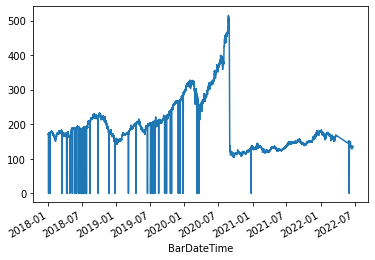

In [ ]:
df['FirstTradePrice'] = df['FirstTradePrice'].astype(float)
df['FirstTradePrice'].plot()

In [ ]:
df.iloc[40000]

TradeDate                                             2018-05-18
Ticker                                                      AAPL
SecId                                                          0
OpenBarTimeOffset                                              0
OpenBidPrice                                              186.93
                                             ...                
TradeToMidVolWeightRelative                             -0.21233
TimeWeightBid                                          186.80377
TimeWeightAsk                                          186.82257
Hour                                                          10
Returns                        -0.001396020539152759948652118100
Name: 2018-05-18 10:40:00, Length: 63, dtype: object

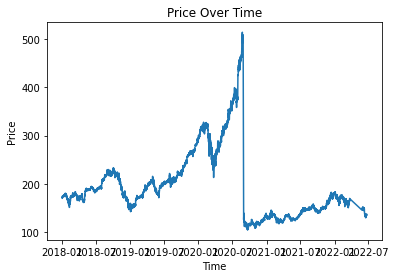

In [ ]:
first_trade_plot = df.loc[df['FirstTradePrice'] > 0]
last_trade_plot = df.loc[df['LastTradePrice'] > 0]

plt.plot(first_trade_plot.index, first_trade_plot['FirstTradePrice'])
# plt.plot(last_trade_plot['LastTradePrice'])
plt.title('Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

<AxesSubplot: xlabel='BarDateTime'>

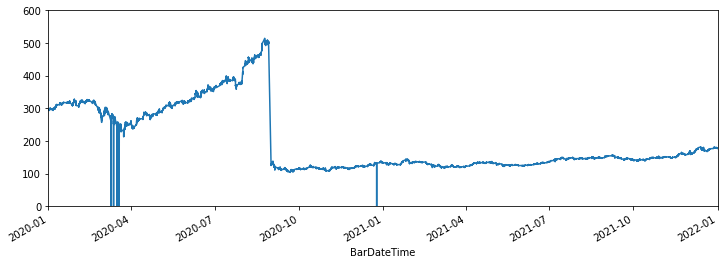

In [ ]:
df['FirstTradePrice'].plot(xlim=['2020-01-01','2022-01-01'],ylim=[0,600],figsize=(12,4))

<AxesSubplot: xlabel='BarDateTime'>

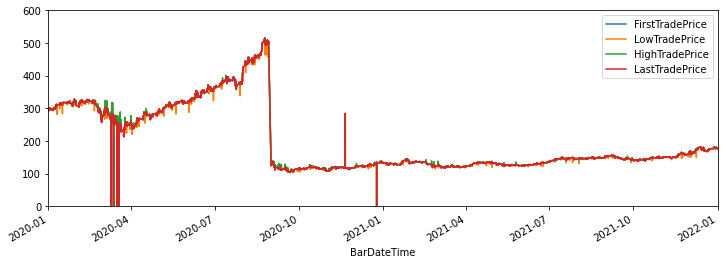

In [ ]:
df['LastTradePrice'] = df['LastTradePrice'].astype(float)
df['HighTradePrice'] = df['HighTradePrice'].astype(float)
df['LowTradePrice'] = df['LowTradePrice'].astype(float)


df[['FirstTradePrice', 'LowTradePrice', 'HighTradePrice', 'LastTradePrice']].plot(xlim=['2020-01-01','2022-01-01'],ylim=[0,600],figsize=(12,4))

<AxesSubplot: xlabel='BarDateTime'>

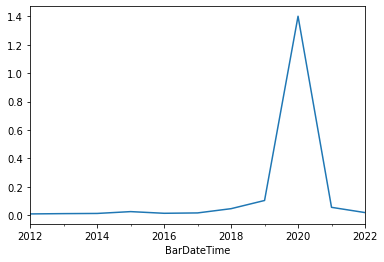

In [ ]:
df['Returns'].resample(rule='A').max().plot(kind='line')